<a href="https://colab.research.google.com/github/EsbenUrbak/Airbnb/blob/master/Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Loading the necessary libraries and the Airbnb data
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

#London Airbnb Data raw links
url_listings = "http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/data/listings.csv.gz"
url_reviews = "http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/data/reviews.csv.gz"

#loading data
df_listings = pd.read_csv(url_listings)
#df_reviews = pd.read_csv(url_reviews)
df_listings.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200911161730,2020-09-15,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Lambeth,NaN,51.46225,-0.11732,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Dishes and silverware"", ""Pack \u2019n Play/t...",$87.00,2,180,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,256,2020-09-15,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,t,3,3,0,0,1.50
1,13913,https://www.airbnb.com/rooms/13913,20200911161730,2020-09-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a day,71%,86%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Ethernet connection"", ""Patio or balcony"", ""C...",$40.00,1,29,1,1,29,29,1.0,29.0,NaN,t,30,60,90,365,2020-09-16,21,5,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,3,1,2,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20200911161730,2020-09-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,100%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dishes and silverware"", ""Microwave"", ""Luggag...",$75.00,10,50,10,10,50,50,10.0,50.0,NaN,t,15,45,75,350,2020-09-16,89,2,0,200

# New Section

In [3]:
# Reducing the data set to the columns of interest
columns_about_host = df_listings[["host_since","host_response_time","host_response_rate", "host_is_superhost","host_neighbourhood","host_has_profile_pic"]]
columns_listing_features = df_listings[["price","neighbourhood_cleansed","property_type","accommodates","bathrooms_text","bedrooms","beds","minimum_nights","maximum_nights","instant_bookable"]]

In [4]:
#Lets look at the features:
columns_listing_features.count()

price                     77591
neighbourhood_cleansed    77591
property_type             77591
accommodates              77591
bathrooms_text            77439
bedrooms                  72842
beds                      76594
minimum_nights            77591
maximum_nights            77591
instant_bookable          77591
dtype: int64

In [9]:
#Converting the variables:
#convert price into a numerical value:
columns_listing_features[columns_listing_features.columns[0:1]] = columns_listing_features[columns_listing_features.columns[0:1]].replace('[\$,]', '', regex=True).astype(float)

#Checking what types we have
print(columns_listing_features.dtypes);

price                     float64
neighbourhood_cleansed     object
property_type              object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
minimum_nights              int64
maximum_nights              int64
instant_bookable           object
dtype: object


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
# convert bath rooms into simple numerical and a type:
columns_listing_features[["number_baths","type_bath"]]=columns_listing_features["bathrooms_text"].str.split(' ', expand=True, n=1)
#columns_listing_features["number_baths"]=columns_listing_features["number_baths"].astype(str).astype(float)
print(columns_listing_features["number_baths"].unique())
# cleaning the data - in this case it seem safe to simply remove rows with missing data as we will still have more than 70k data points
columns_listing_features_clean = columns_listing_features.dropna()
columns_listing_features_clean.count()

['1' '2' '1.5' '0' nan '2.5' 'Shared' '4' '3' '3.5' 'Half-bath' '5' '4.5'
 'Private' '7' '6' '5.5' '10' '7.5' '8' '8.5' '9.5' '6.5' '11.5' '17' '11'
 '10.5' '9' '12']


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


price                     71762
neighbourhood_cleansed    71762
property_type             71762
accommodates              71762
bathrooms_text            71762
bedrooms                  71762
beds                      71762
minimum_nights            71762
maximum_nights            71762
instant_bookable          71762
number_baths              71762
type_bath                 71762
dtype: int64

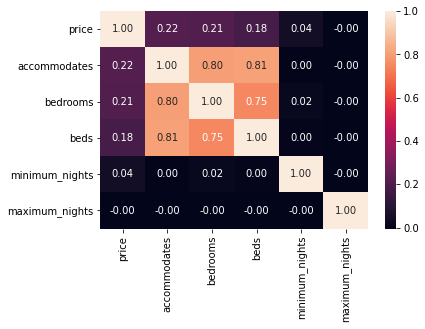

In [ ]:
# for fun lets have a look at a correlation matrixs
sns.heatmap(columns_listing_features_clean.corr(), annot=True, fmt=".2f");